<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB
None
       profile pic  nums/length username  fullname words  \
count   576.000000            576.000000      576.000000   
mean

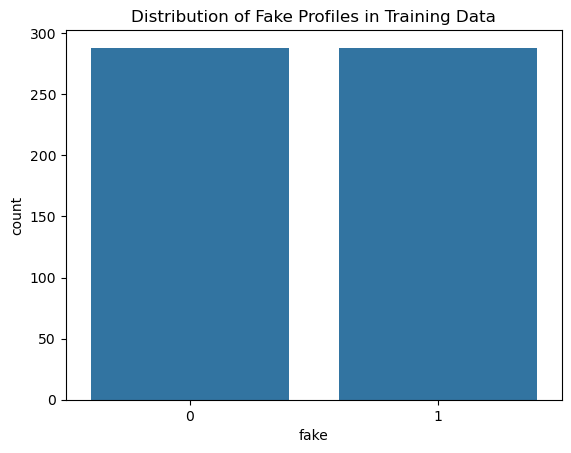

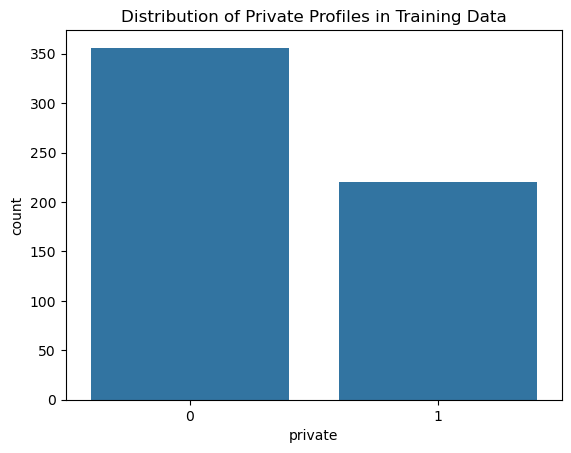

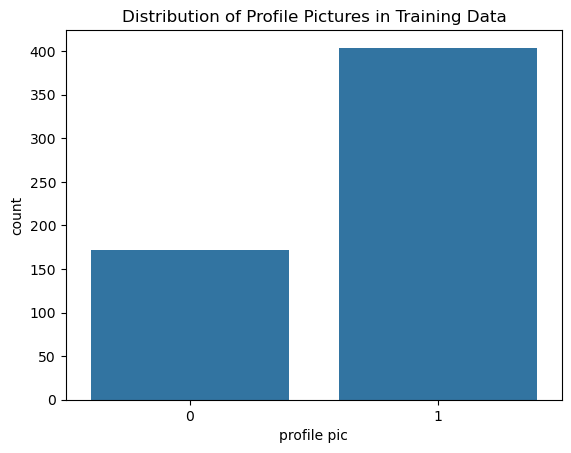

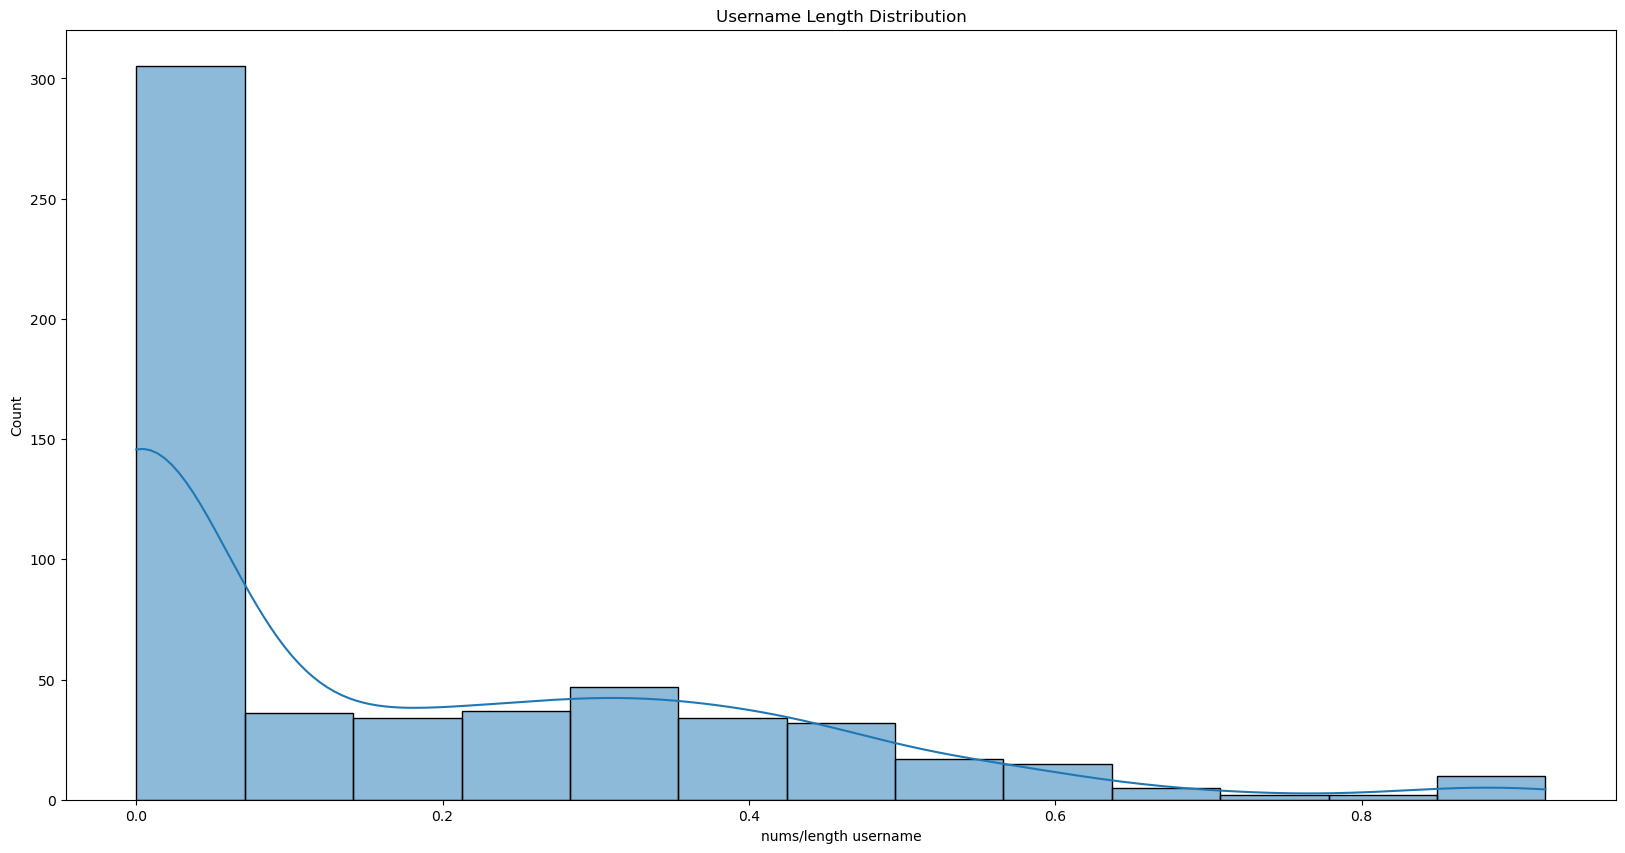

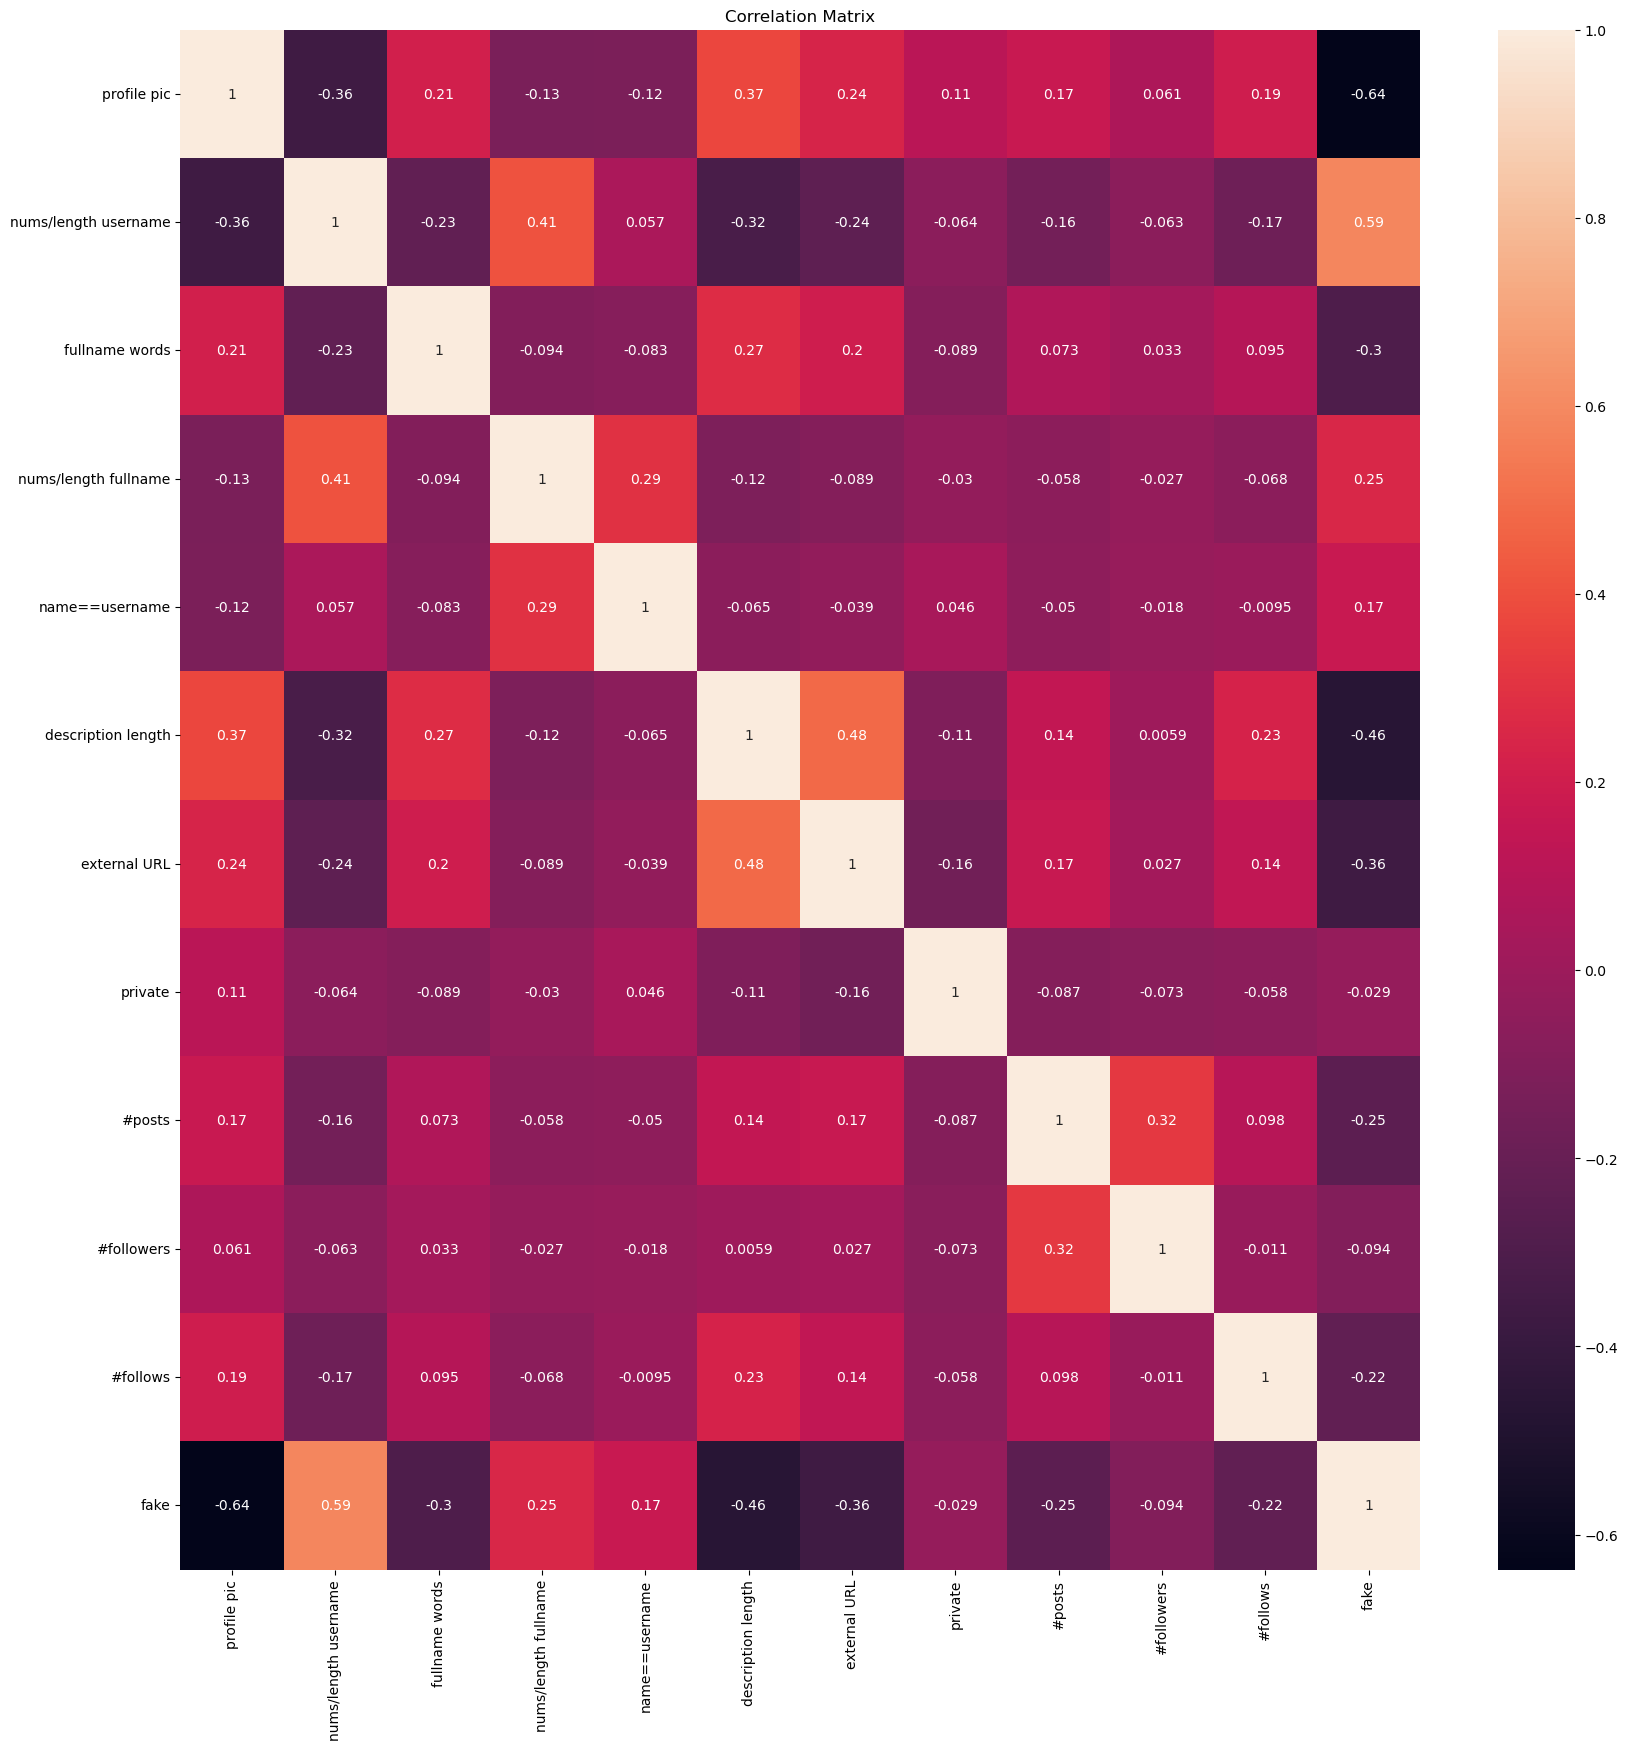

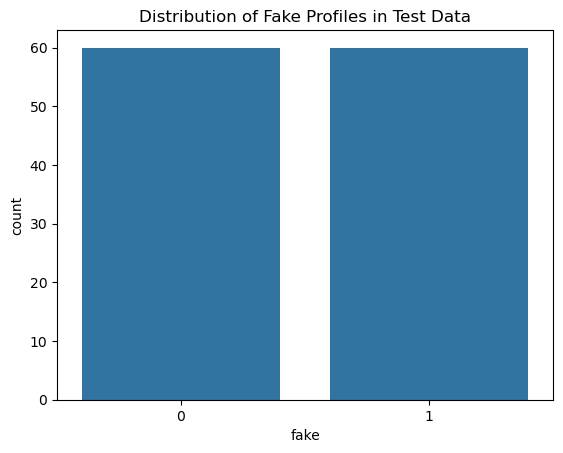

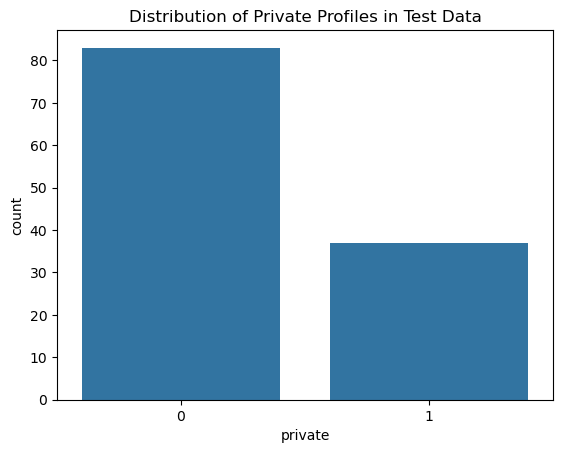

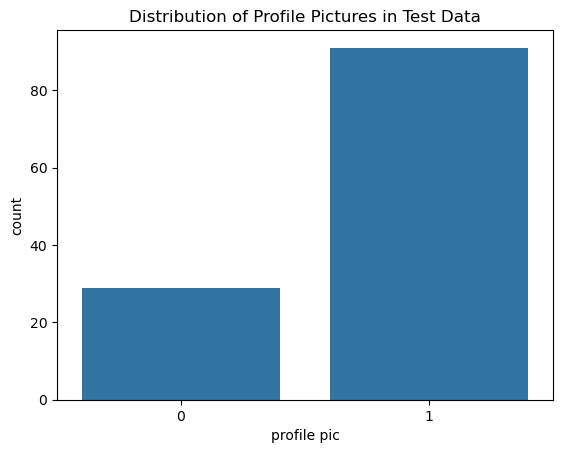

C:\Users\Mohammed Akif\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.5585 - loss: 0.6894 - val_accuracy: 0.9138 - val_loss: 0.3877
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8086 - loss: 0.4716 - val_accuracy: 0.9138 - val_loss: 0.2332
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8826 - loss: 0.3398 - val_accuracy: 0.8793 - val_loss: 0.2369
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9198 - loss: 0.2411 - val_accuracy: 0.9138 - val_loss: 0.1622
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9119 - loss: 0.2394 - val_accuracy: 0.9138 - val_loss: 0.1536
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9148 - loss: 0.2439 - val_accuracy: 0.8448 - val_loss: 0.2401
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9253 - loss: 0.2315 - val_accuracy: 0.8793 - val_loss: 0.1970
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8967 - loss: 0.2669 - val_accuracy: 0.8621 - val_loss

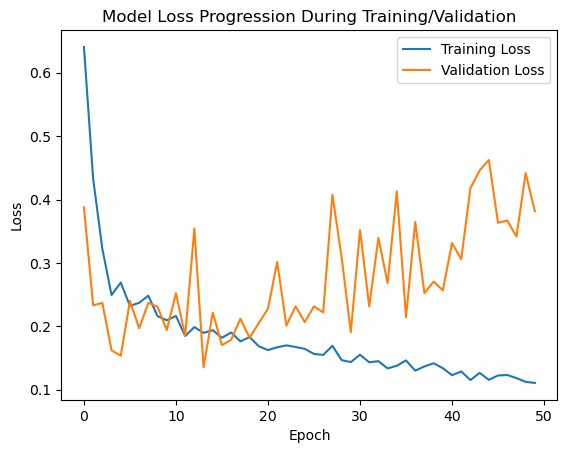

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        60
           1       0.90      0.90      0.90        60

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



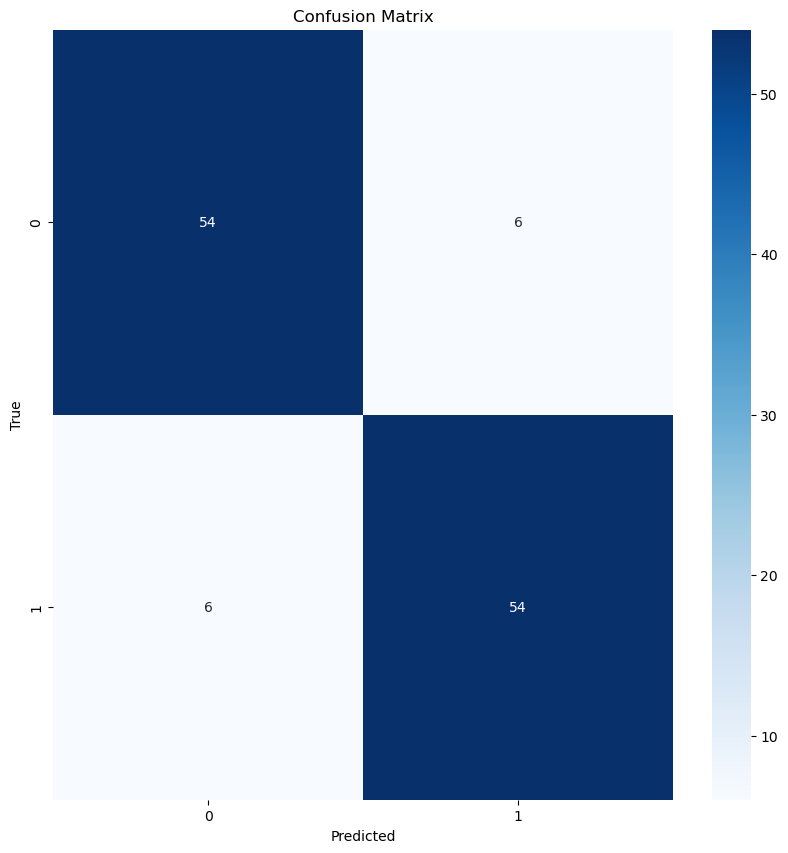

Profile ID 'instagram' exists: Real Profile
Profile ID 'https://www.instagram.com/mypulsarofficial?utm_source=ig_web_button_share_sheet&igsh=ZDNlZDc0MzIxNw==' does not exist: Fake Profile
Profile 'https://www.instagram.com/mypulsarofficial?utm_source=ig_web_button_share_sheet&igsh=ZDNlZDc0MzIxNw==' reported successfully.


In [3]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import requests

# Load the datasets
instagram_df_train = pd.read_csv('insta_train.csv')
instagram_df_test = pd.read_csv('insta_test.csv')

# Perform Exploratory Data Analysis (EDA)
print(instagram_df_train.info())
print(instagram_df_train.describe())
print(instagram_df_train.isnull().sum())
print(instagram_df_train['profile pic'].value_counts())
print(instagram_df_train['fake'].value_counts())

print(instagram_df_test.info())
print(instagram_df_test.describe())
print(instagram_df_test.isnull().sum())
print(instagram_df_test['fake'].value_counts())

# Data Visualizations
sns.countplot(x='fake', data=instagram_df_train)
plt.title('Distribution of Fake Profiles in Training Data')
plt.show()

sns.countplot(x='private', data=instagram_df_train)
plt.title('Distribution of Private Profiles in Training Data')
plt.show()

sns.countplot(x='profile pic', data=instagram_df_train)
plt.title('Distribution of Profile Pictures in Training Data')
plt.show()

plt.figure(figsize=(20, 10))
sns.histplot(instagram_df_train['nums/length username'], kde=True)
plt.title('Username Length Distribution')
plt.show()

plt.figure(figsize=(20, 20))
sns.heatmap(instagram_df_train.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

sns.countplot(x='fake', data=instagram_df_test)
plt.title('Distribution of Fake Profiles in Test Data')
plt.show()

sns.countplot(x='private', data=instagram_df_test)
plt.title('Distribution of Private Profiles in Test Data')
plt.show()

sns.countplot(x='profile pic', data=instagram_df_test)
plt.title('Distribution of Profile Pictures in Test Data')
plt.show()

# Preparing Data to Train the Model
X_train = instagram_df_train.drop(columns=['fake'])
X_test = instagram_df_test.drop(columns=['fake'])

y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

# Handling missing values if any
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Scale the data
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Building and Training Deep Learning Model
model = Sequential([
    Dense(50, input_dim=X_train.shape[1], activation='relu'),
    Dense(150, activation='relu'),
    Dropout(0.3),
    Dense(150, activation='relu'),
    Dropout(0.3),
    Dense(25, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs_hist = model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.1)

# Visualize Training History
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

# Evaluating the Model
predicted = model.predict(X_test)
predicted_value = np.argmax(predicted, axis=1)
test = np.argmax(y_test, axis=1)

print(classification_report(test, predicted_value))

plt.figure(figsize=(10, 10))
cm = confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Function to Check Instagram Profile Existence and Report if Fake
def check_and_report_instagram_profile(profile_id):
    url = f"https://www.instagram.com/{profile_id}/"
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            # Check for specific content that indicates a profile exists
            if 'Sorry, this page isn\'t available.' in response.text:
                print(f"Profile ID '{profile_id}' does not exist: Fake Profile")
                report_fake_profile(profile_id)
            else:
                print(f"Profile ID '{profile_id}' exists: Real Profile")
        elif response.status_code == 404:
            print(f"Profile ID '{profile_id}' does not exist: Fake Profile")
            report_fake_profile(profile_id)
        else:
            print(f"Failed to verify profile. Status code: {response.status_code}")
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

# Function to Report Fake Profile
def report_fake_profile(profile_id):
    report_url = "https://www.instagram.com/mypulsarofficial?utm_source=ig_web_button_share_sheet&igsh=ZDNlZDc0MzIxNw=="  # Replace with actual reporting URL
    data = {'profile_id': profile_id, 'reason': 'Fake profile detected by automated system'}
    try:
        response = requests.post(report_url, data=data, timeout=10)
        if response.status_code == 200:
            print(f"Profile '{profile_id}' reported successfully.")
        else:
            print(f"Failed to report profile. Status code: {response.status_code}")
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while reporting: {e}")

# Example usage of the function
check_and_report_instagram_profile('instagram')  # Likely to be a real profile
check_and_report_instagram_profile('https://www.instagram.com/mypulsarofficial?utm_source=ig_web_button_share_sheet&igsh=ZDNlZDc0MzIxNw==')  # Likely to be a non-existent profile
